# EJERCICIOS

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.datasets import mnist
import os
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from tensorflow.keras.utils import to_categorical
from keras import Sequential
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Concatenate, Conv2D, MaxPooling2D,Dropout

## EJERCICIO 1

Crea tu propia CNN desde el principio e intenta conseguir la mayor exactitud posible con MNIST (por ejemplo 99% en el conjunto de prueba).

En vez de crear un conjunto de validación en el fit indica que porcentaje (10%) vas a usar para el conjunto de validación (validation_split)

Por ejemplo:
* 2 capas convolucionales (32 filtros)
* 1 capa maxpool
* 2 capas convolucionales (64 filtros)
* 1 capa maxpool
* 1 capa flatten
* 1 capa dropout
* 1 capa densa oculta
* 1 capa dropout
* 1 capa densa de salida

Usá como función de pérdida categorical_crossentropy.

Ten en cuenta que:
* sparse_categorical_crossentropy: se usa cuando las etiquetas de las clases están representadas como enteros (codificación entera), por ejemplo: 0, 1, 2, 3, ... para n clasess
* categorical_crossentropy: se usa cuando las etiquetas están representadas en formato one-hot encoded.

Tal y com tenemos los datos podemos usar directamente sparse_categorical_crossentropy, para poder aplicar categorical_crossentropy hay que hacer una transformación en y (to_categorical).

Haz una predicción y muestra la imagen con la etiqueta real y la predicha.

Epoch 1/20
422/422 - 5s - 13ms/step - accuracy: 0.8870 - loss: 0.3527 - val_accuracy: 0.9845 - val_loss: 0.0522
Epoch 2/20
422/422 - 1s - 3ms/step - accuracy: 0.9678 - loss: 0.1072 - val_accuracy: 0.9913 - val_loss: 0.0319
Epoch 3/20
422/422 - 1s - 3ms/step - accuracy: 0.9778 - loss: 0.0738 - val_accuracy: 0.9913 - val_loss: 0.0293
Epoch 4/20
422/422 - 1s - 3ms/step - accuracy: 0.9814 - loss: 0.0625 - val_accuracy: 0.9915 - val_loss: 0.0296
Epoch 5/20
422/422 - 1s - 3ms/step - accuracy: 0.9846 - loss: 0.0537 - val_accuracy: 0.9918 - val_loss: 0.0284
Epoch 6/20
422/422 - 1s - 3ms/step - accuracy: 0.9862 - loss: 0.0479 - val_accuracy: 0.9935 - val_loss: 0.0268
Epoch 7/20
422/422 - 1s - 2ms/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9925 - val_loss: 0.0288
Epoch 8/20
422/422 - 1s - 2ms/step - accuracy: 0.9881 - loss: 0.0397 - val_accuracy: 0.9937 - val_loss: 0.0231
Epoch 9/20
422/422 - 1s - 3ms/step - accuracy: 0.9895 - loss: 0.0361 - val_accuracy: 0.9930 - val_loss: 0.0275


2025-01-27 19:31:38.554437: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_86', 4 bytes spill stores, 4 bytes spill loads



Exactitud en el conjunto de prueba: 99.49%


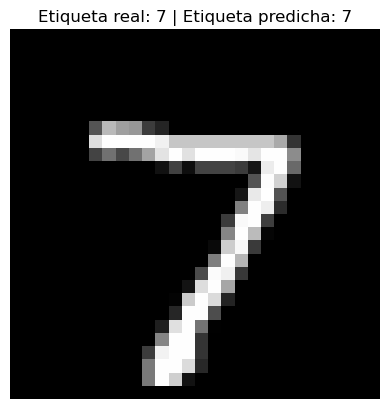

In [ ]:
# Carga de datos
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocesamiento de datos
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

# Si quisiéramos usar categorical_crossentropy, usamos to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Creación del modelo CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5), 
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') #Salida
])

# Compilación del modelo
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',  # Usamos sparse por las etiquetas enteras
              metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, batch_size=128, 
                    validation_split=0.1, verbose=2)

# Evaluación en el conjunto de prueba
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Exactitud en el conjunto de prueba: {test_acc * 100:.2f}%")

# Predicción y visualización de resultados
def plot_prediction(index):
    image = x_test[index].reshape(28, 28)
    true_label = y_test[index]
    pred_label = np.argmax(model.predict(x_test[index:index+1], verbose=0))

    plt.imshow(image, cmap='gray')
    plt.title(f"Etiqueta real: {true_label} | Etiqueta predicha: {pred_label}")
    plt.axis('off')
    plt.show()

# Ejemplo: visualización de una predicción
plot_prediction(0)

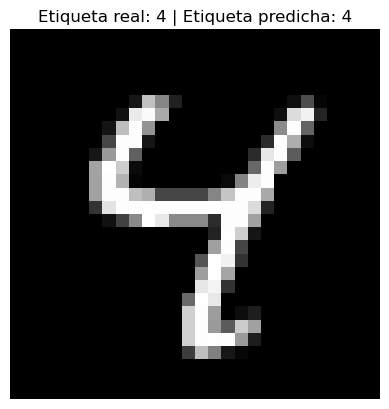

In [11]:
plot_prediction(6)

## EJERCICIO 2

Haz unas fotos con tu movil (a objetos) y usando alguno de los modelos que existen (por ejemplo ResNet101V2). Tendrás de adecuar el tamaño de las fotos antes de intentar predecir que es lo que has fotografiado.

Tendrás que investigar como añadir cargar tus images, un buen sitio por donde empezar es por la documentación de Keras para ResNEt101V2.

## EJERCICIO 3

El dataset food101 es un conjunto de datos consta de 101 categorías de alimentos, con 101000 imágenes. Para cada clase, se proporcionan 250 imágenes de prueba revisadas manualmente, así como 750 imágenes de entrenamiento. A propósito, las imágenes de entrenamiento no se limpiaron y, por lo tanto, aún contienen cierta cantidad de ruido. Esto viene principalmente en forma de colores intensos y, a veces, etiquetas incorrectas. Todas las imágenes se redimensionaron para tener una longitud lateral máxima de 512 píxeles.
* Carga el conjunto de imagenes: entrenamiento, validación (coge la mitad de los datos de prueba) y prueba (coge la otra mitad de los datos de prueba)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añade más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambia el tamaño para que sea adecuado para el modelo, normaliza...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2): coge todo menos la última capa y añade una capa globalaveragepooling y la capa dense de salida. En este caso utiliza como función de pérdida sparse_categorical_crossentropy
* Busca una imagen de comida en Internet y haz una predicción

Por defecto tensorflow busca y descarga los dato en:
* Linux/Mac: ~/tensorflow_datasets/
* Windows: C:\Users\<usuario>\tensorflow_datasets\

Los datos puedes copiarlo de mi disco duro o descarlos, pero son 5.12GB

## EJERCICIO 4

Repite el ejercicio pero para otros datos (tienes conjuntos de datos en https://www.tensorflow.org/datasets/catalog/overview?hl=es-419 en el apartado image classificación, por ejemplo puedes usar stanford_dogs) y utilizando otra de las redes conocidas que no se haya utilizado todavía.
Para cargar los datos en este caso vas a descargar las imagnes a tu ordenador y cargarlos desde ahi (descargar la carpeta al ordenador y luego cargarlo desde la carpeta con python (mage_dataset_from_director)):

* Carga el conjunto de imagenes (entrenamiento, validación y pruebas)
* Explora los datos: dimensiones, número de elementos, dibuja algunas imagenes con sus etiquetas...
* Prepara los datos: añadir más elementos al conjunto de entrenamiento (rotando, trasladando... las imagenes acutales), cambiar el tamaño para que sea adecuado para el modelo, normalizar...
* Entrena un modelo para estos datos usando algunas de las redes ya existentes (por ejemplo: MobileNetV2)
* Busa una imagen en Internet y haz una predicción

## EJERCICIO 5

Sigue el tutorial de TensorFlow Style Transfer (https://homl.info/styletuto) hasta definir representaciones de contenido y estilo (hay que hacer sólo los primeros puntos, hasta el punto  Transferencia de estilo rápido usando TF-Hub (incluido)).

Haz algo parecido no igual (por lo menos cambia de imagenes).

Además tienes que poner comentarios para explicar con tus palabras lo que estas haciendo.

Realmente lo que esta haciendo es aplicar una capas convolucionales a una imagen, donde los filtros se han sacado de otra imagen.

## EJERCICIO 6

Crea un modelo sencillo que aplique un filtro personalizado a una imagen de contenido mediante una capa convolucional es un buen ejercicio para entender cómo funcionan las convoluciones en el procesamiento de imágenes.

Carga una imagen desde archivo preparala para se procesada por la red:
* Cargar la imagen (tf.keras.preprocessing.image.load_im)
* Convertir la imagen a un tensor de NumPy y redimensionarla:
    * tf.keras.preprocessing.image.img_to_array
    * tf.image.resize
* Añadir una dimensión de batch al tensor de la imagen (np.expand_dims)


Define un filtro personalizado para aplicar a la imagen. Los filtros son matrices pequeñas que modifican los píxeles de la imagen al aplicar la convolución.

Por ejemplo aquí tienes un filtro de bordes:

```python
filtro = np.array([
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]],
    [[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]
], dtype=np.float32)
```
El filtro debe tener forma (altura, anchura, canales_entrada, canales_salida) (usa reshape)

Crea un modelo secuencial en Keras con una única capa convolucional que utilice tu filtro personalizado.

Visualiza el resultado (muestra la imagen original y la imagen con el filtro y pon un título a cada imagen)

## EJERCICIO 7
Repite el ejercicio anterior con diferentes modelos y filtros:
* Prueba otro filtro (mostrar imagen original e imagen con filtro)
* Prueba con tres filtros a la vez (mostrar la imagen resultante de cada filtro)
* Prueba con tres filtros y dos capas convolucionales (mostrar imagen original e imagne con filtro)